# Библиотека ADTK<br>
##Инструментарий для обнаружения аномалий (Anomaly Detection Toolkit)

ADTK - это библиотека Python для обнаружения аномалий во временных рядах без учителя (unsupervised learning). 
Поскольку природа и свойства аномалий в разных случаях различны, невозможно найти модель для поиска аномалий, которая будет работать одинаково хорошо со всеми видами аномалий. Правильным подходом для построения эффективной модели является - *совместное использование* анализа данных, построения и отбора признаков, подходящих алгоритмов обнаружения аномалий и применение ансамблевых методов.

ADTK включает в себя три типа компонентов:<br> 
 

*  Детекторы — это компоненты, которые сканируют временные ряды и возвращают аномальные временные точки. Входят в модуль adtk.detector.
*  Трансформаторы — это компоненты, которые преобразуют временные ряды таким образом, чтобы извлекалась полезная информация. Входят в состав модуля adtk.transformer.
*   Агрегаторы — это компоненты, которые объединяют различные результаты обнаружения (списки аномалий). Это ансамблевая составляющая. Включены в модуль adtk.aggregator.<br>
<br> 

Библиотека также позволяет создавать объекты Pipeline или Pipenet, а также предоставляет некоторые функции для обработки и визуализации временных рядов и аномалий.<br>
>><a href="https://adtk.readthedocs.io/en/stable/index.html#">Документация к библиотеке</a><br>
<a href="https://github.com/arundo/adtk">Репозиторий Github</a><br>
<a href="https://mybinder.org/v2/gh/arundo/adtk/master?filepath=docs%2Fnotebooks%2Fdemo.ipynb">Примеры в интерактивной демонстрационной записной книжке</a><br>



---
## Библиотека работает с неразмеченными данными (unsupervised learning)<br>




Большой проблемой при поиске аномалий на реальных данных является то, что данные как правило не размечены, поэтому изначально строго не определено, что такое аномалия для конкретных данных. В таких ситуациях необходимо применять методы обучения без учителя (unsupervised learning), при этом модели самостоятельно определяют взаимосвязи и характерные законы в данных.
ADTK - это библиотека для обнаружения аномалий во временных рядах без учителя (unsupervised learning).




---


## **Обзор моделей ADTK в соответствии с типами аномалий**:
 
Аномалия — это широкое понятие, которое может относиться к различным типам событий во временных рядах. Изменение стоимости, сдвиг волатильности, нарушение сезонного паттерна и т.д. Все это может быть аномальным или нормальным событием, в зависимости от конкретного набора данных. ADTK предлагает набор общих инструментов, которые могут быть объединены и использованы для обнаружения аномалий для различных наборов данных. Однако нужно понимать, какой тип аномалии необходимо обнаружить в данных, чтобы выбрать модель и построить ее соответствующим образом.


---
## **Выбросы**
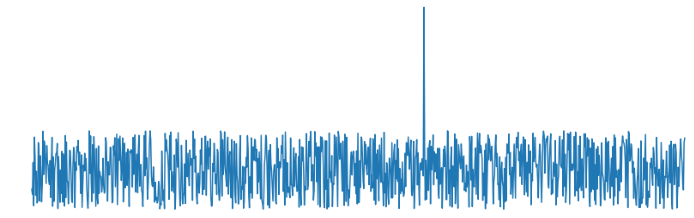
 

**Выброс (outlier)** — это экстремальные значения во входных данных, которые находятся далеко за пределами других наблюдений, без учета временной связи между значениями. Другими словами, даже рассматривая все точки данных вне зависимости от времени, рассматриваемая точка является экстримальным значением.
Чтобы обнаружить выбросы детектору необходимо определить нормальный диапазон значений. Он может быть определен с помощью заданных пользователем абсолютных пороговых значений **(adtk.detector.ThresholdAD)**. В качестве альтернативы можно использовать детектор для определения нормального диапазона на основании исторических данных **(adtk.detector.QuantileAD, adtk.detector.InterQuartileRangeAD и adtk.detector.GeneralizedESDTestAD)**



---
## Всплеск и сдвиг уровня
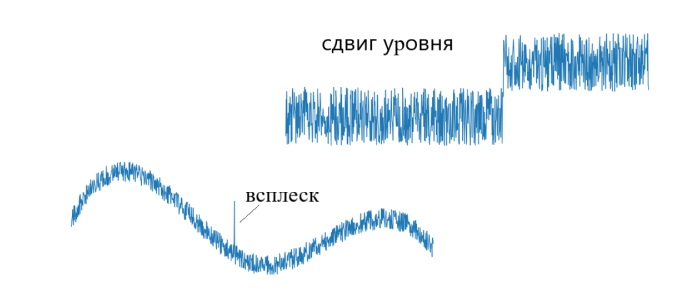


В некоторых ситуациях, чтобы понять является ли значение в данных нормальным, необходимо определить соответствует ли ее значение значениям данных в близлежащем прошлом. Резкое увеличение или уменьшение значения называется всплеском, если изменение является временным, или сдвигом уровня, если изменение является постоянным. Обратите внимание, что, хотя всплеск похож на выброс, он зависит от времени, в то время как выброс не зависит от времени. Значение всплеска может быть нормальным, если сравнивать его со всеми точками в данных без учета временного порядка.<br>
Мы можем сдвигать два временных окна бок о бок и продолжать отслеживать разницу между их средними или медианными значениями. Эта разница во времени, которая является новым временным рядом, исследуется детектором выбросов. Всякий раз, когда статистика в левом и правом окнах значительно отличается, это указывает на выброс. Длина временного окна управляет временной шкалой обнаружения изменений: для пиков левое окно должно быть длиннее правого для захвата репрезентативной информации о ближайшем прошлом; с другой стороны, для сдвигов уровня оба окна должны быть достаточно длинными.

**adtk.detector.PersistAD и adtk.detector.LevelShiftAD** являются детекторами всплесков и сдвигов уровней соответственно. Оба реализованы с трансформатором **adtk.transformer.DoubleRollingAggregate**, который преобразует временной ряд в новый ряд с двумя временными окнами.




---


## Изменение паттерна
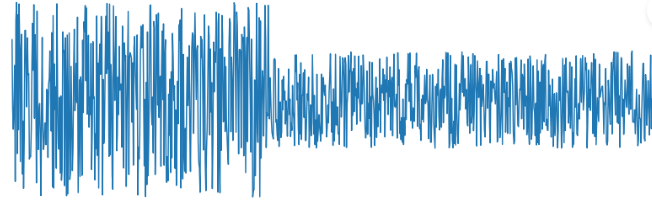



Упомянутая выше стратегия может быть обобщена для выявления изменения паттернов. Например, если изменения волатильности представляют интерес для выявления аномалий, то статистическим методом для отслеживания во временных окнах может стать стандартное отклонение, а не средним/медианным. **adtk.transformer.DoubleRollingAggregate**. Библиотека содержит 16 различных статистических методов, которые могут быть использованы для оценки интересующей закономерности.



---
## Сезонность
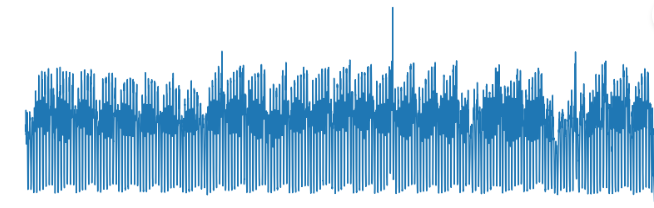


Сезонная закономерность существует тогда, когда на временные ряды влияют сезонные факторы (например, час дня, день недели, месяц года). Детектор **adtk.detector.SeasonalAD** выявляет аномальные нарушения сезонного характера, он использует трансформатор **adtk.transformer.ClassicSeasonalDecomposition** для удаления сезонного паттерна из исходного временного ряда.

### **Фреймворки для построения ансамблей моделей**

# Рассмотрим пример использования библиотеки ADTK

# Установим библиотеку

In [ ]:
! pip install adtk

In [11]:
import numpy as np
import pandas as pd
from adtk.visualization import plot
from adtk.detector import ThresholdAD
from adtk.detector import VolatilityShiftAD
from adtk.detector import SeasonalAD

from adtk.data import validate_series

## В качестве данных будем использовать общедоступный набор данных востроебованности таксти в городе Нью-Йорке с шагом в 1 час (данные с 01.07.2014 по 31.01.2015)


In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.set_index(['timestamp']).asfreq('h')
s = validate_series(data) # функция исправляет некоторые распространенные критические проблемы, 
                          # которые могут вызвать проблемы (временной индекс не монотонно увеличивается,
                          # индекс времени содержит дубликаты меток времени
                          # (исправляются путем сохранения первых значений) и
                          # преобразует категориальные данные в двоичные т.п.)
s.head()


,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 01:00:00,6210
2014-07-01 02:00:00,3820
2014-07-01 03:00:00,2369
2014-07-01 04:00:00,2221


## В данном примере мы определим временные точки, когда спрос на такси превысит пороговое значение higt или будет ниже порогового значения low

In [19]:
threshold_val = ThresholdAD(high=27000, low=1000) # установим пороговые значения
anomalies = threshold_val.detect(s)

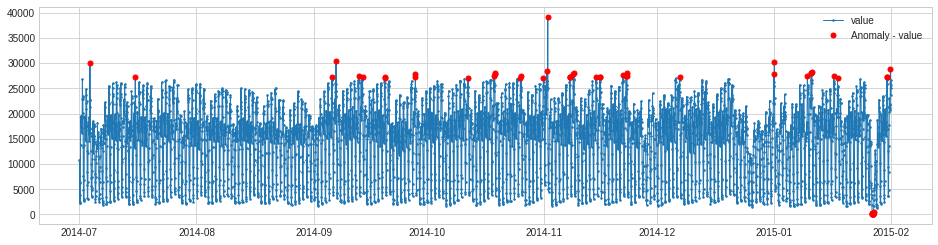

In [20]:
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

## В следующем примере мы определим положительный сдвиг волатильности. VolatilityShiftAD обнаруживает сдвиг уровня волатильности, отслеживая разницу между стандартными отклонениями в двух скользящих рядом друг с другом временных окнах

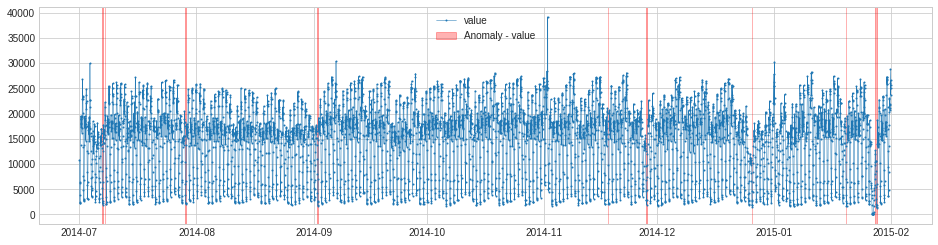

In [26]:

volatility_shift_ad = VolatilityShiftAD(c=2.0, side='positive', window=30)
anomalies = volatility_shift_ad.fit_detect(s)
plot(s, anomaly=anomalies, anomaly_color='red');

# Изменим параметры и определим отрицательный сдвиг волатильности

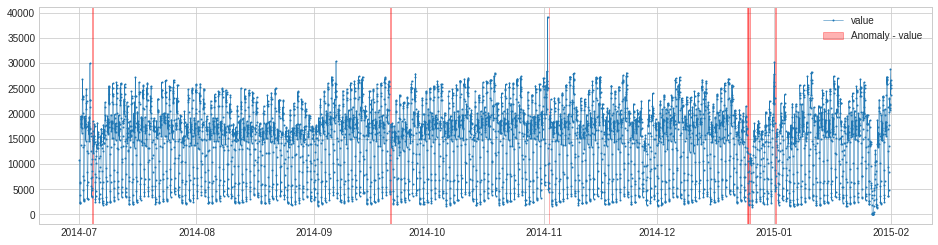

In [30]:
volatility_shift_ad = VolatilityShiftAD(c=1.5, side='negative', window=30)
anomalies = volatility_shift_ad.fit_detect(s)
plot(s, anomaly=anomalies, anomaly_color='red');

## Определим аномальные нарушения спроса на такси сезонного характера

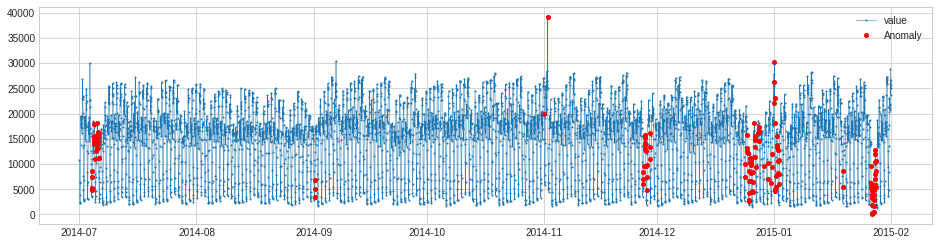

In [32]:
seasonal_vol = SeasonalAD()
anomalies = seasonal_vol.fit_detect(data.value)
anomalies.value_counts()

plot(data, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker");

Необычный спрос на такси, как мы видим, в основном происходил в крупные праздники.